<h1 align="center">Exploratory Data Analysis of Belgian Mortality Data</h1>

# 1. Introduction

## Project goal
The goal of this project is to conduct an end-to-end analysis of mortality data in Belgium using Python. The analysis covers data acquisition, cleaning, exploratory data analysis (EDA), visualization, and interpretation of findings.

## Dataset description
The dataset comes from the [Belgian Statistics Office (Statbel)](https://statbel.fgov.be/en/open-data/number-deaths-day-sex-district-age) and contains daily mortality counts from 2009 to the present. Dataset is part of the Open Data datasets collection, which make it free to use for commercial as well as non-commercial purposes. The data is available in XLSX format and updated every week by the source.
### Variables
- CD_REGIO - Code of region
- CD_PROV - Code of province
- CD_ARR - Code of district
- CD_SEX - Sex (1=male 2=female)
- CD_AGEGROUP - Six age groups
    - 0-24,
    - 25-44,
    - 45-64,
    - 5-74,
    - 75-84,
    - 85+
- DT_DATE - Date
- NR_YEAR - Year
- NR_WEEK - Week
- MS_NUM_DEATH - Number of deaths

# 2. Importing Libraries and Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt
import numpy as np

In [47]:
dataset_url = "https://statbel.fgov.be/sites/default/files/files/opendata/deathday/DEMO_DEATH_OPEN.xlsx"
dataset = pd.read_excel(dataset_url)

In [48]:
variables_url = "https://statbel.fgov.be/sites/default/files/files/opendata/deathday/DEMO_DEATHS-Columns.xlsx"
region = pd.read_excel(variables_url, 'CD_REGIO')
province = pd.read_excel(variables_url, 'CD_PROV')
district = pd.read_excel(variables_url, 'CD_ARR')

# 3. Data Overview

Main data is stored in dataset variable. Under variables_url the source provides a file containing metadata for the dataset. Loading the appropriate sheets into variables enables linking codes with their corresponding region names.

In [49]:
dataset.head()

,CD_ARR,CD_PROV,CD_REGIO,CD_SEX,CD_AGEGROUP,DT_DATE,NR_YEAR,NR_WEEK,MS_NUM_DEATH
0,11000,10000,2000,1,45-64,2009-01-01,2009,2009-W01,2
1,11000,10000,2000,1,65-74,2009-01-01,2009,2009-W01,3
2,11000,10000,2000,1,75-84,2009-01-01,2009,2009-W01,6
3,11000,10000,2000,1,85+,2009-01-01,2009,2009-W01,5
4,11000,10000,2000,2,65-74,2009-01-01,2009,2009-W01,1


In [50]:
district.head()

,CD_ARR,TX_DSCR_NL,TX_DESCR_FR
0,11000,Arrondissement Antwerpen,Arrondissement d’Anvers
1,12000,Arrondissement Mechelen,Arrondissement de Malines
2,13000,Arrondissement Turnhout,Arrondissement de Turnhout
3,21000,Arrondissement Brussel-Hoofdstad,Arrondissement de Bruxelles-Capitale
4,23000,Arrondissement Halle-Vilvoorde,Arrondissement de Hal-Vilvorde


In [51]:
province.head()

,CD_PROV,TX_DESCR_NL,TX_DESCR_FR
0,10000,Provincie Antwerpen,Province d’Anvers
1,20001,Provincie Vlaams-Brabant,Province du Brabant flamand
2,20002,Provincie Waals-Brabant,Province du Brabant wallon
3,30000,Provincie West-Vlaanderen,Province de Flandre occidentale
4,40000,Provincie Oost-Vlaanderen,Province de Flandre orientale


In [52]:
region.head()

,CD_REGIO,TX_DESCR_NL,TX_DESCR_NL.1
0,2000,Vlaams Gewest,Région flamande
1,3000,Waals Gewest,Région wallonne
2,4000,Brussels Hoofdstedelijk Gewest,Région de Bruxelles-Capitale


Column which is storing region names in French is having a wrong name. (NL instead of FR)

In [53]:
dataset.describe()

,CD_ARR,CD_PROV,CD_REGIO,CD_SEX,DT_DATE,NR_YEAR,MS_NUM_DEATH
count,998439.000000,998439.000000,998439.000000,998439.000000,998439,998439.000000,998439.000000
mean,45683.884544,41796.184038,2491.459168,1.476708,2017-04-28 19:47:23.986262272,2016.837543,1.832514
min,11000.000000,4000.000000,2000.000000,1.000000,2009-01-01 00:00:00,2009.000000,1.000000
25%,25000.000000,20002.000000,2000.000000,1.000000,2013-03-06 00:00:00,2013.000000,1.000000
50%,44000.000000,40000.000000,2000.000000,1.000000,2017-05-06 00:00:00,2017.000000,1.000000
75%,62000.000000,60000.000000,3000.000000,2.000000,2021-06-20 00:00:00,2021.000000,2.000000
max,93000.000000,90000.000000,4000.000000,2.000000,2025-07-27 00:00:00,2025.000000,33.000000
std,22510.662299,23590.570743,589.049148,0.499457,NaN,4.784672,1.391616


In [54]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998439 entries, 0 to 998438
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   CD_ARR        998439 non-null  int64         
 1   CD_PROV       998439 non-null  int64         
 2   CD_REGIO      998439 non-null  int64         
 3   CD_SEX        998439 non-null  int64         
 4   CD_AGEGROUP   998439 non-null  object        
 5   DT_DATE       998439 non-null  datetime64[ns]
 6   NR_YEAR       998439 non-null  int64         
 7   NR_WEEK       998439 non-null  object        
 8   MS_NUM_DEATH  998439 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 68.6+ MB


In [55]:
district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CD_ARR       43 non-null     int64 
 1   TX_DSCR_NL   43 non-null     object
 2   TX_DESCR_FR  43 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [56]:
province. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CD_PROV      10 non-null     int64 
 1   TX_DESCR_NL  10 non-null     object
 2   TX_DESCR_FR  10 non-null     object
dtypes: int64(1), object(2)
memory usage: 372.0+ bytes


In [57]:
region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CD_REGIO       3 non-null      int64 
 1   TX_DESCR_NL    3 non-null      object
 2   TX_DESCR_NL.1  3 non-null      object
dtypes: int64(1), object(2)
memory usage: 204.0+ bytes


Preliminary data quality checks indicate that the dataset is in good condition, with correctly assigned data types and no missing values.

# 4. Data Cleaning & Validation

At the beginning we can fix first issue recognized during data overview - fixing name of column.

In [58]:
region.rename(columns={'TX_DESCR_NL.1': 'TX_DESCR_FR'}, inplace=True)
region.head()

,CD_REGIO,TX_DESCR_NL,TX_DESCR_FR
0,2000,Vlaams Gewest,Région flamande
1,3000,Waals Gewest,Région wallonne
2,4000,Brussels Hoofdstedelijk Gewest,Région de Bruxelles-Capitale


In [59]:
dataset.isnull().sum()

CD_ARR          0
CD_PROV         0
CD_REGIO        0
CD_SEX          0
CD_AGEGROUP     0
DT_DATE         0
NR_YEAR         0
NR_WEEK         0
MS_NUM_DEATH    0
dtype: int64

In [60]:
dataset.duplicated().value_counts()

False    998439
Name: count, dtype: int64

A second validation confirmed that the dataset contains no missing values or duplicate entries. The next step is to remove the current year, as it is incomplete and could distort certain statistics.

In [61]:
current_year = dt.datetime.now().year
dataset = dataset[dataset['NR_YEAR'] < current_year]

To ensure full data integrity before moving forward, the next step will involve validating all regional, provincial, and municipal codes against the official reference metadata. This will help confirm the accuracy and consistency of the dataset and eliminate the risk of typographical or classification errors.

In [62]:
def code_checker(codes):
    errors = []

    valid_sets = {
        'CD_ARR': set(district['CD_ARR'].values),
        'CD_PROV': set(province['CD_PROV'].values),
        'CD_REGIO': set(region['CD_REGIO'].values)
    }

    if codes.name not in valid_sets:
        print('Wrong input!')
        return

    current_set = valid_sets[codes.name]

    for idx, code in codes.items():
        if code in current_set:
            continue
        else:
            errors.append((idx, code, 'Invalid code'))

    errors_count = len(errors)

    if not errors:
        print(f'All codes in {codes.name} are correct')
    else:
        print(f'Total errors {errors_count}\nErrors in rows:')
        for e in errors[:3]: # remove [:3] for having full list of errors. Right now it's limited for better notebook readability
             print(f'  Row {e[0]}: Code "{e[1]}" - {e[2]}')

In [63]:
code_checker(dataset['CD_ARR'])

All codes in CD_ARR are correct


In [64]:
code_checker(dataset['CD_PROV'])

Total errors 46834
Errors in rows:
  Row 949989: Code "4000" - Invalid code
  Row 949990: Code "4000" - Invalid code
  Row 949991: Code "4000" - Invalid code


In [65]:
code_checker(dataset['CD_REGIO'])

All codes in CD_REGIO are correct


The validation function identified multiple rows containing the incorrect code “4000” in the province column. Fortunately, this appears to be a simple typo, as the correct code “40000” exists in the metadata. We will proceed to replace the erroneous values accordingly.

In [66]:
dataset['CD_PROV'] = dataset['CD_PROV'].replace(4000,40000)

In [67]:
code_checker(dataset['CD_PROV'])

All codes in CD_PROV are correct


Our dataset is now fully prepared and ready for analysis.

# 5. Feature Engineering

Before moving on to visualizations, we will prepare a set of aggregated variables that will make the analysis more insightful.
The dataset contains individual records of mortality with details such as date, gender, age group, and region. By creating yearly, weekly, and demographic breakdowns, we can more easily detect trends, seasonal patterns, and differences between population segments.
These aggregated datasets will serve as the foundation for the upcoming exploratory visualizations and allow for targeted comparisons (e.g., between genders, across regions, or within specific age groups).

In [68]:
# Aggregates
def aggregate_deaths(data, group_cols):
    return data.groupby(group_cols)['MS_NUM_DEATH'].sum().reset_index()

In [69]:
total_yearly = aggregate_deaths(dataset, ['NR_YEAR'])
yearly_by_age = aggregate_deaths(dataset, ['NR_YEAR', 'CD_AGEGROUP'])
yearly_by_gender = aggregate_deaths(dataset, ['NR_YEAR', 'CD_SEX']).replace([1,2],['Male','Female'])
total_weekly = aggregate_deaths(dataset, ['NR_WEEK'])
region_breakdown = aggregate_deaths(dataset, ['NR_YEAR', 'CD_REGIO'])
province_breakdown = aggregate_deaths(dataset, ['NR_YEAR', 'CD_PROV'])
district_breakdown = aggregate_deaths(dataset, ['NR_YEAR', 'CD_ARR'])

In [70]:
# Annual - additional variables
total_yearly['rolling_mean'] = total_yearly['MS_NUM_DEATH'].rolling(window=4).mean()

total_yearly['YoY_change'] = total_yearly['MS_NUM_DEATH'].pct_change() * 100

age_pivot = yearly_by_age.pivot(index='NR_YEAR', columns='CD_AGEGROUP', values='MS_NUM_DEATH') # pivot for bar chart


In [71]:
# Weekly - additional variables
week_to_date = dataset.groupby('NR_WEEK')['DT_DATE'].min().reset_index() # extracting first day of every week

total_weekly = total_weekly.merge(week_to_date, on='NR_WEEK', how='left')

In [72]:
# Code mapping
def merge_maps(breakdown_df, ref_df, key):
    merged = breakdown_df.merge(ref_df, left_on=key, right_on=key, how='left')
    return merged

In [73]:
region_map = merge_maps(region_breakdown, region, 'CD_REGIO')
province_map = merge_maps(province_breakdown, province, 'CD_PROV')
district_map = merge_maps(district_breakdown, district, 'CD_ARR')

In [74]:
# Sorting biggest number of deaths in last year
def get_latest_year_sorted_data(data):
    latest_year = data['NR_YEAR'].max()
    data_latest_year = data[data['NR_YEAR'] == latest_year]
    data_sorted = data_latest_year.sort_values(by='MS_NUM_DEATH', ascending=False)
    return data_sorted

In [75]:
sorted_province = get_latest_year_sorted_data(province_map)
sorted_region = get_latest_year_sorted_data(region_map)
sorted_district = get_latest_year_sorted_data(district_map)

# 5. Exploratory Data Analysis (EDA)

In this section, we conduct a comprehensive exploratory data analysis to uncover key patterns and insights within the mortality dataset. The visualizations presented here are designed to illustrate temporal trends, demographic variations, geographic distributions, seasonal patterns, as well as anomalies and year-over-year changes.


In [ ]:
# setting global theme for charts
sns.set_theme(style="white",palette="crest")

## Trends over time

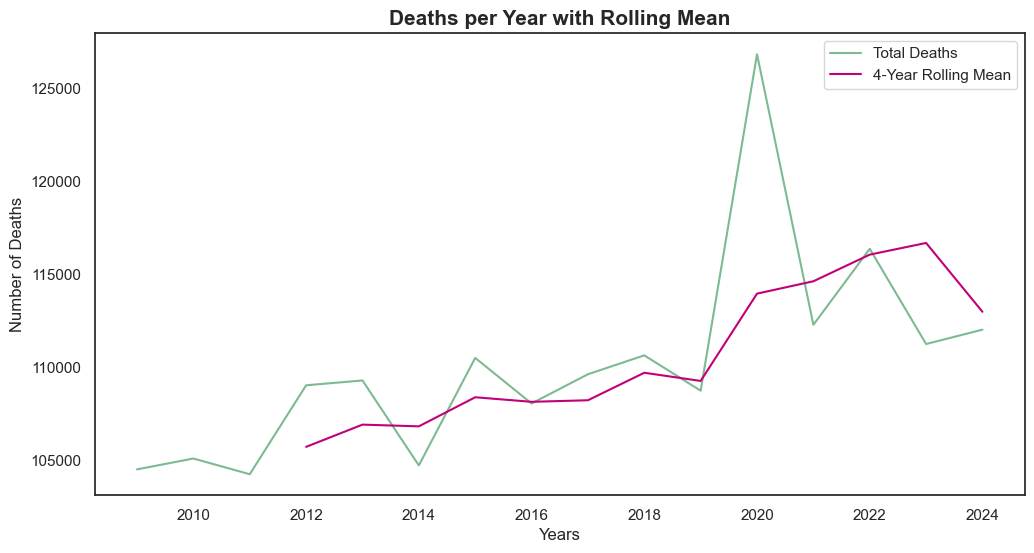

In [79]:
plt.figure(figsize=(12,6))
plt.plot(total_yearly['NR_YEAR'], total_yearly['MS_NUM_DEATH'], label='Total Deaths')
plt.plot(total_yearly['NR_YEAR'], total_yearly['rolling_mean'], label='4-Year Rolling Mean', color = 'xkcd:magenta')
plt.title('Deaths per Year with Rolling Mean', fontweight='bold', fontsize=15)
plt.ylabel('Number of Deaths')
plt.xlabel('Years')
plt.legend()
plt.show()

The mortality line between 2009 and 2019, when compared to the moving average line, showed a slight upward trend with periods of stabilization. In 2020, there was an extreme peak directly linked to the COVID-19 pandemic. During the years 2021-2023, the nominal number of deaths decreased significantly, yet remained above pre-pandemic levels. The moving average also indicated an upward trend, likely associated with post-pandemic complications. In 2024, a downward trend finally emerged, which may signal a return to regular levels. However, it can be assumed that the long-term trend will remain slightly upward due to the ageing population.

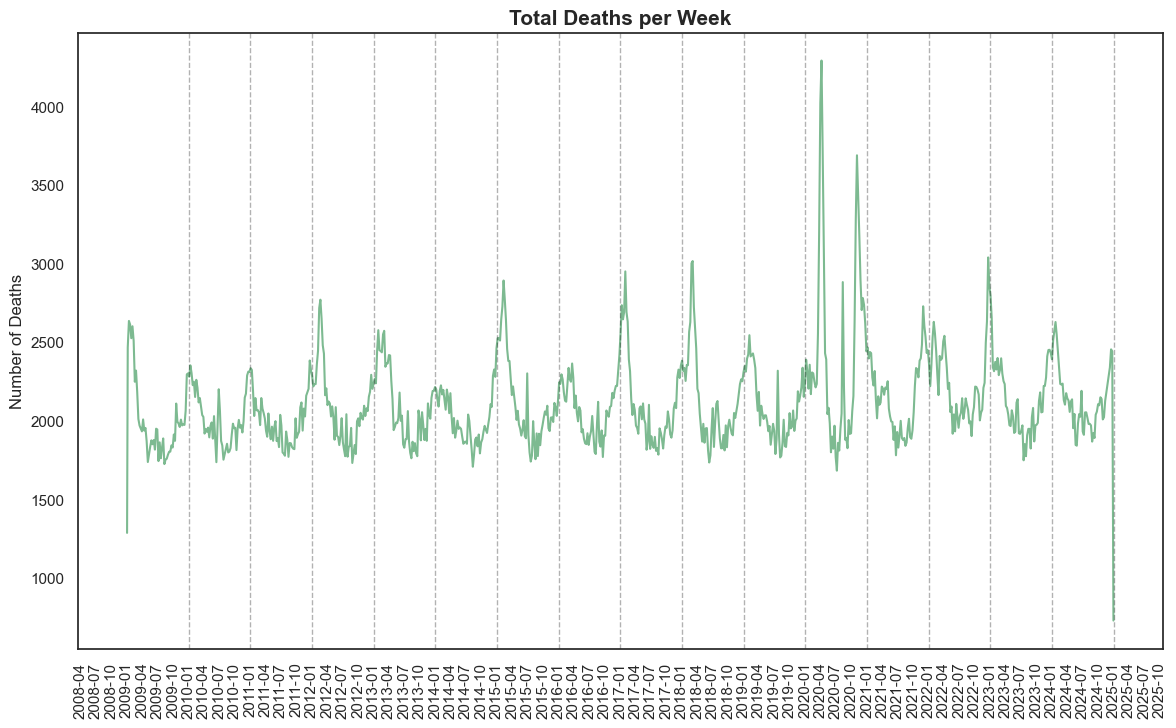

In [78]:
plt.figure(figsize=(14,8))
sns.lineplot(data=total_weekly, x='DT_DATE', y='MS_NUM_DEATH')

# reducing amout of tickers and displaying as quarters
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1,4,7,10], bymonthday=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=90)

# marking start of every year
xlims = ax.get_xlim()

start_date = mdates.num2date(xlims[0])
end_date = mdates.num2date(xlims[1])

start_year = start_date.year
end_year = end_date.year

for year in range(start_year+2, end_year+1):
    date = pd.Timestamp(year=year, month=1, day=1)
    ax.axvline(x=date, color='black', linestyle='--', linewidth=1, alpha=0.3)

plt.title('Total Deaths per Week', fontweight='bold', fontsize=15)
plt.ylabel('Number of Deaths')
plt.xlabel('')
plt.show()

Increasing data frequency to weekly allows for observing seasonality in the dataset. The plot reveals a recurring peak at the beginning of each year — a well-known demographic phenomenon referred to as the “New Year effect.” The flu season and weather conditions contribute to increased mortality, especially among the elderly and individuals with chronic illnesses, which can lead to healthcare system overload. Some demographic studies also suggest that stress during the holidays may contribute to this seasonality. This phenomenon occurs in many countries, and Belgium is no exception.

On the plot, we can observe a record-high mortality peak in the second quarter of 2020, coinciding with the onset of the COVID-19 pandemic. The same year shows two additional peaks corresponding to subsequent waves of the virus. The last abnormal peak appears at the turn of 2021 and 2022, linked to the fourth wave of COVID-19. Since then, the mortality trend has returned to normal levels.

## Demographics 

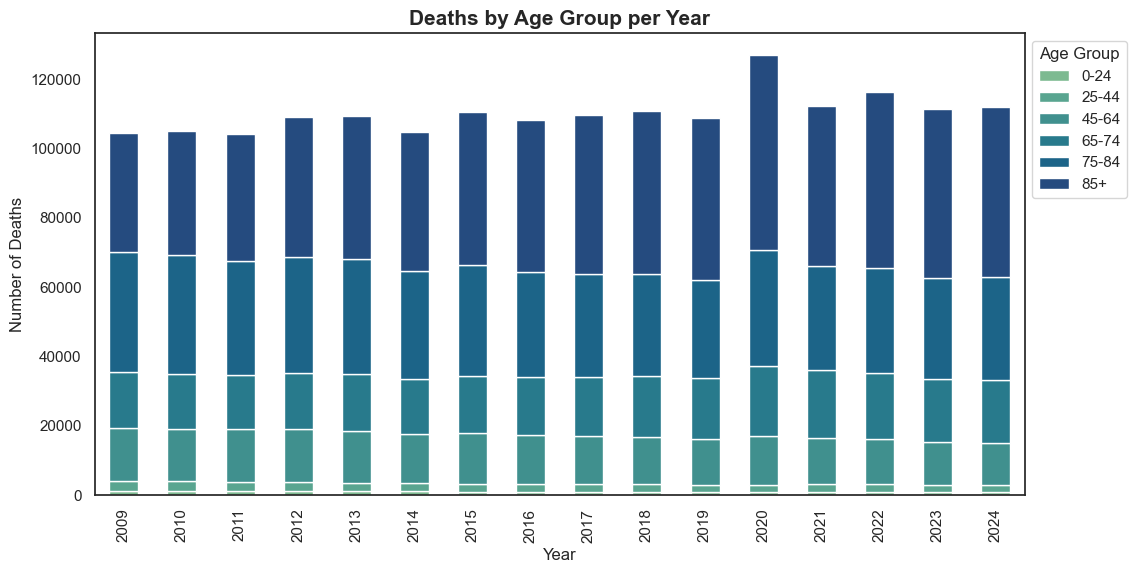

In [81]:
age_pivot.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Deaths by Age Group per Year', fontweight='bold', fontsize=15)
plt.ylabel('Number of Deaths')
plt.xlabel('Year')
plt.legend(title='Age Group', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

The age distribution of deaths clearly shows that mortality increases with age. This is expected, as older populations naturally have higher death rates due to aging and associated health conditions.

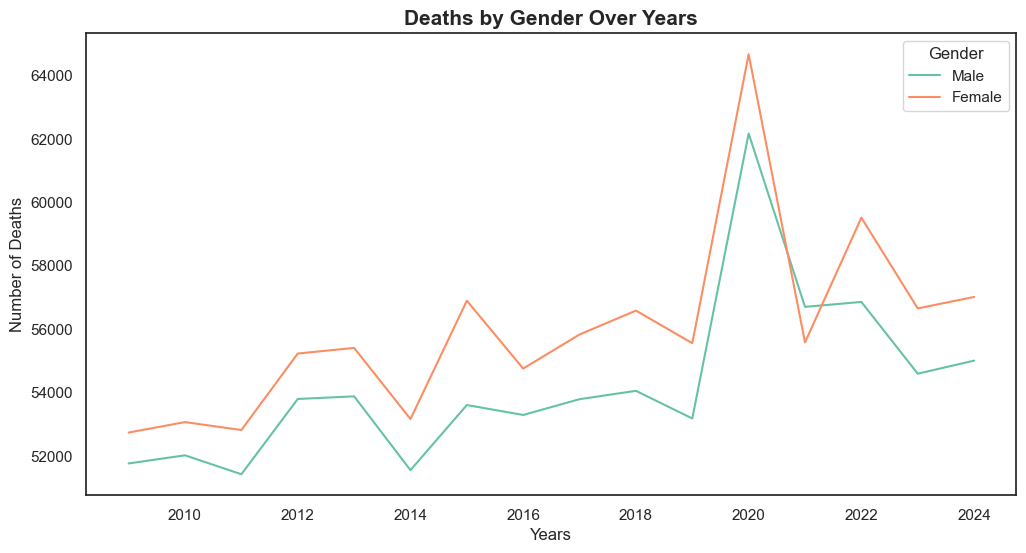

In [80]:
plt.figure(figsize=(12,6))
ax = sns.lineplot(data=yearly_by_gender, x='NR_YEAR', y='MS_NUM_DEATH', hue='CD_SEX', palette='Set2')
ax.legend(title='Gender')
plt.title('Deaths by Gender Over Years', fontweight='bold', fontsize=15)
plt.xlabel('Years')
plt.ylabel('Number of Deaths')
plt.show()

Comparing deaths by gender reveals that slightly more women die than men overall. This difference is primarily due to demographic factors - women generally live longer, resulting in a larger female population in older, higher-risk age groups. Men tend to have higher mortality at younger ages due to factors like heart disease and accidents. This pattern is typical in developed countries with aging populations like Belgium.

## Geographic

Charts in that section presents the total number of deaths per region in Belgium for the most recent complete year. It highlights regional variations in mortality, which can be influenced by factors such as population size, age distribution, socioeconomic conditions, and access to healthcare. Identifying regions with higher mortality rates helps target public health interventions and resource allocation more effectively.

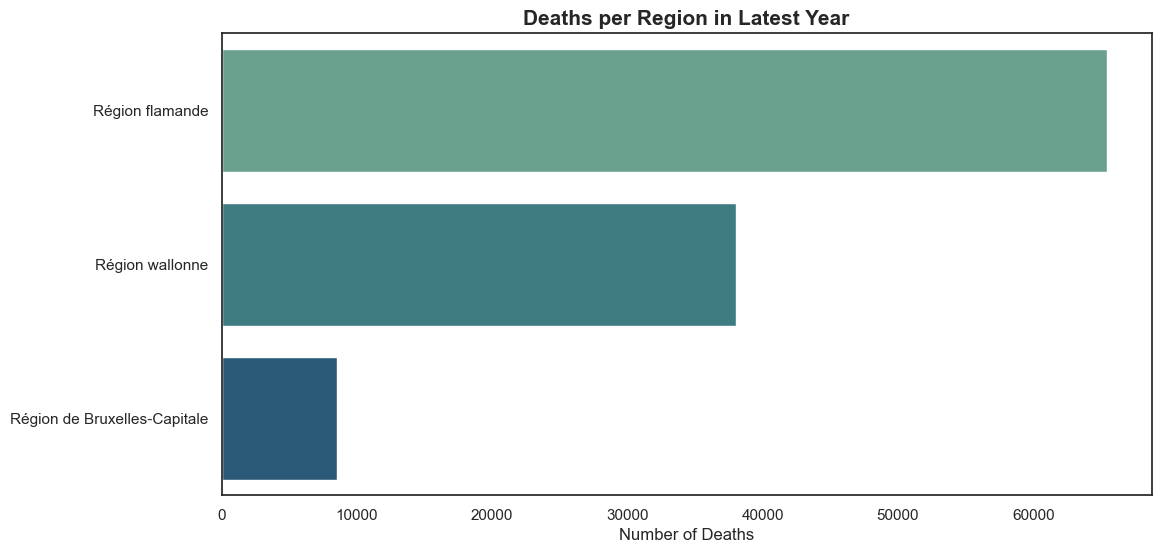

In [82]:
plt.figure(figsize=(12,6))
sns.barplot(data=sorted_region,
            x='MS_NUM_DEATH', y='TX_DESCR_FR', hue='TX_DESCR_FR', legend=False, palette='crest')
plt.title('Deaths per Region in Latest Year', fontweight='bold', fontsize=15)
plt.xlabel('Number of Deaths')
plt.ylabel('')
plt.show()

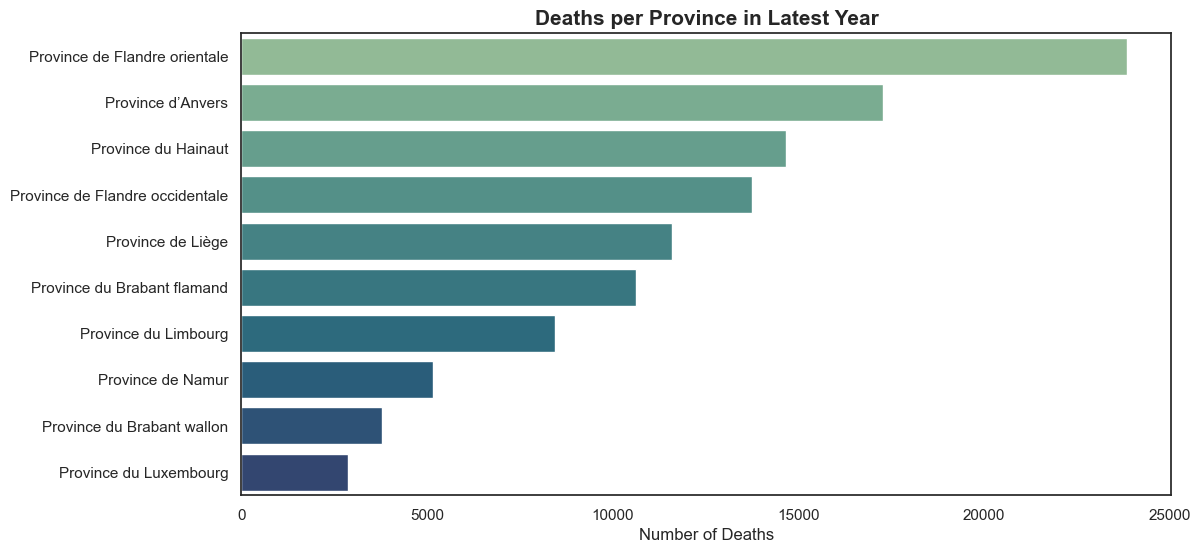

In [83]:
plt.figure(figsize=(12,6))
sns.barplot(data=sorted_province,
            x='MS_NUM_DEATH', y='TX_DESCR_FR', hue='TX_DESCR_FR', legend=False, palette='crest')
plt.title('Deaths per Province in Latest Year', fontweight='bold', fontsize=15)
plt.xlabel('Number of Deaths')
plt.ylabel('')
plt.show()

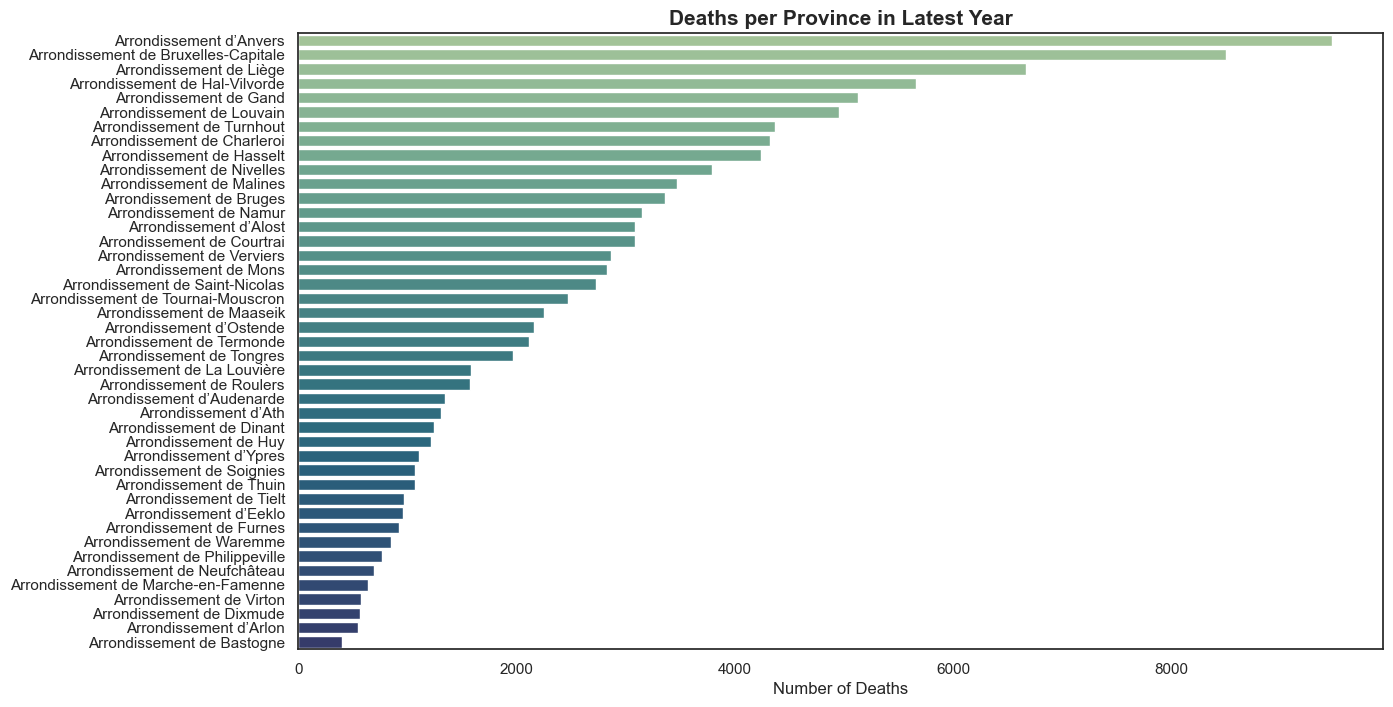

In [84]:
plt.figure(figsize=(14,8))
sns.barplot(data=sorted_district,
            x='MS_NUM_DEATH', y='TX_DESCR_FR', hue='TX_DESCR_FR', legend=False, palette='crest')
plt.title('Deaths per Province in Latest Year', fontweight='bold', fontsize=15)
plt.xlabel('Number of Deaths')
plt.ylabel('')
plt.show()

## Outliers & Year-over-Year Changes

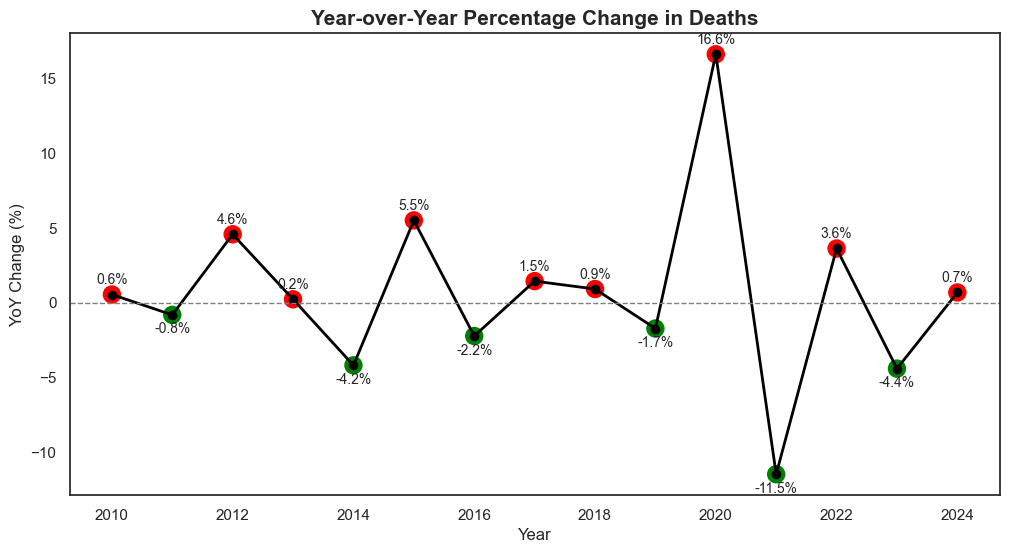

In [92]:
plt.figure(figsize=(12,6))
colors = ['red' if val > 0 else 'green' for val in total_yearly['YoY_change']]
plt.plot(total_yearly['NR_YEAR'], total_yearly['YoY_change'], marker='o', linewidth=2, color='black')
plt.scatter(total_yearly['NR_YEAR'], total_yearly['YoY_change'], c=colors, s=150)

for i, val in enumerate(total_yearly['YoY_change']):
    plt.text(total_yearly['NR_YEAR'][i], val + np.sign(val)*0.5, f"{val:.1f}%", 
             ha='center', va='bottom' if val > 0 else 'top', fontsize=10)

plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title('Year-over-Year Percentage Change in Deaths', fontweight='bold', fontsize=15)
plt.ylabel('YoY Change (%)')
plt.xlabel('Year')
plt.show()

Changes mostly fluctuate between about -5% and +5% over the years, indicating natural variations in the number of deaths from year to year. The largest positive spike occurred in 2020 (around +16.6%), which aligns with the onset of the COVID-19 pandemic and increased mortality. The largest decline happened in 2021 (around -11.5%), which may reflect a rebound effect after the record-high year of 2020.

In [95]:
top_anomalies_yoy = total_yearly.loc[total_yearly['YoY_change'].abs().nlargest(5).index]
print(top_anomalies_yoy[['NR_YEAR', 'YoY_change']])

    NR_YEAR  YoY_change
11     2020   16.649041
12     2021  -11.477335
6      2015    5.524097
3      2012    4.591979
14     2023   -4.403678


In [94]:
top_anomalies_week = total_weekly.nlargest(5, 'MS_NUM_DEATH')
print(top_anomalies_week[['NR_WEEK', 'MS_NUM_DEATH']])

      NR_WEEK  MS_NUM_DEATH
588  2020-W15          4292
587  2020-W14          4021
589  2020-W16          3703
618  2020-W45          3689
619  2020-W46          3432


# 7. Insights & Conclusions

The mortality data from Belgium between 2009 and 2024 reveals several important patterns and trends. A generally slight upward trend in mortality prior to 2020 reflects the natural impact of an aging population. The COVID-19 pandemic caused an unprecedented spike in deaths in 2020, with additional abnormal peaks coinciding with subsequent virus waves. Although mortality rates dropped after 2020, they remained elevated above pre-pandemic levels until a noticeable decline in 2024 suggested a gradual return to baseline.

Seasonal patterns are evident in weekly data, particularly the recurring “New Year effect,” where mortality temporarily rises, driven by factors such as flu season, weather, and holiday stress. This seasonality emphasizes the importance of timely healthcare interventions during vulnerable periods.

Year-over-year changes mostly fluctuate within a natural ±5% range, except for the pandemic years which saw extreme deviations. This pattern underscores the impact of extraordinary events on mortality trends, while also illustrating the resilience and eventual stabilization of the population health system.

In summary, the analysis highlights how demographic factors, seasonal effects, and extraordinary events like the COVID-19 pandemic collectively shape mortality trends. These insights can inform public health policies aimed at mitigating risks during peak periods and addressing regional inequalities to improve overall population health resilience.

# 8. About Author

Notebook done by Marta Bińkowska. You can reach me at [LinkedIn](https://linkedin.com/in/binkowska-marta/)